Assignment #2: 
Problems 3, 6, 7, 8 from Chapter 2 (pages 54-55)

In [2]:
datadir='../../Datasets/'
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import Counter
import plfit
from scipy.stats import poisson

Q3

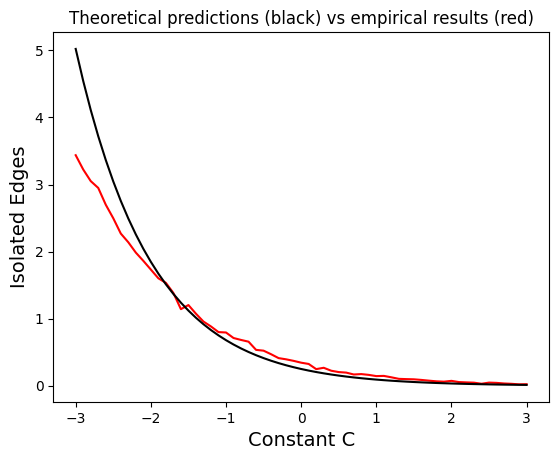

In [3]:
n = 100
#n = 10000 #See below for graph, runtime is quite long but can uncomment if desired.
REP = 1000
low = -3
C = np.arange(low, 3.1, 0.1)
ie_avg = []
ie_std = []
for c in C:
    p = (np.log(n) + np.log(np.log(n)) + c)/(2*n)
    x = []    
    for rep in range(REP):
        isolated_edge_count = 0
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        vertex_list = g.vs
        edge_list = g.get_edgelist()

        for edge in edge_list:
            v1 = edge[0]
            v2 = edge[1]            
            if vertex_list[v1].degree() == 1 and vertex_list[v2].degree() == 1:                
                isolated_edge_count += 1
        
        x.append(isolated_edge_count)

    ie_avg.append(np.mean(x))
    

th = [np.exp(-c)/4 for c in C]

plt.plot(C,ie_avg,color='red') #Using plot instead of fill between as some square roots are returning imaginary numbers for outer ranges
plt.plot(C,th,color='black')
plt.title('Theoretical predictions (black) vs empirical results (red)')
plt.xlabel('Constant C',fontsize=14)
plt.ylabel('Isolated Edges',fontsize=14);

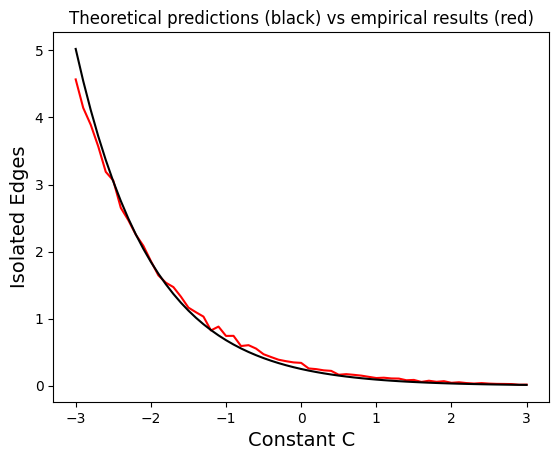

In [4]:
#n = 10000

from IPython.display import Image
Image(filename='Assignment2_Q3b_line_n=10k.png') 

Question 6: 

In [3]:
n = 10000
p = 0.25
g1 = ig.Graph.Erdos_Renyi(n=n, p=p)
g2 = ig.Graph.Erdos_Renyi(n=n, p=p)

el1 = g1.get_edgelist()
el2 = g2.get_edgelist()

el1_set = set(el1)
el2_set = set(el2)

In [4]:
print(len(el1))
print(len(el2))
print(len(el1_set))
print(len(el2_set))

12495843
12498922
12495843
12498922


In [6]:
union_set = set()
for edge1, edge2 in zip(el1_set, el2_set):

    if edge1 in el1_set or edge1 in el2_set:
        union_set.add(edge1)

    if edge2 in el1_set or edge2 in el2_set:
        union_set.add(edge2)

In [9]:
num_union_edges = len(union_set) # num_union_edges is 21868037 for our run

In [24]:
num_union_edges = 21868037
num_pairs = 10000*(10000+1)/2 #Use identity for binomial coefficient
ratio = num_union_edges/num_pairs*100
print(ratio)

0.4373170082991701


The value of ratio is a bit less than the probability p + p = 1/2. This is to be expected as there are some edges that will be common to both graph 1 and graph 2, so it makes sense our total number of connected edges for the union of our graphs is a bit less than p + p = 1/2, which assumes indpendent probabilities.

Question 7:

In [ ]:

P = np.arange(0, 1.01, 0.01)
REPS = 5
local_clustering_coefficients = []
global_clustering_coefficients = []

for p in P:
    #ws_graph = ig.Graph.Watts_Strogatz(dim=2, p=p, size=100, nei=8)    
    global_list = []
    local_list = []
    for i in range(REPS): #Smoothing
        ws_graph = ig.Graph.Watts_Strogatz(dim=2, p=p, size=100, nei=8)
        global_c = ws_graph.transitivity_undirected(mode='nan')
        global_list.append(global_c)

        local_c = ws_graph.transitivity_avglocal_undirected(mode='nan')
        local_list.append(local_c)

    global_c_avg = sum(global_list)/REPS
    global_clustering_coefficients.append(global_c_avg)
    local_c_avg = sum(local_list)/REPS
    local_clustering_coefficients.append(local_c_avg)
#Runtime about 5 mintues


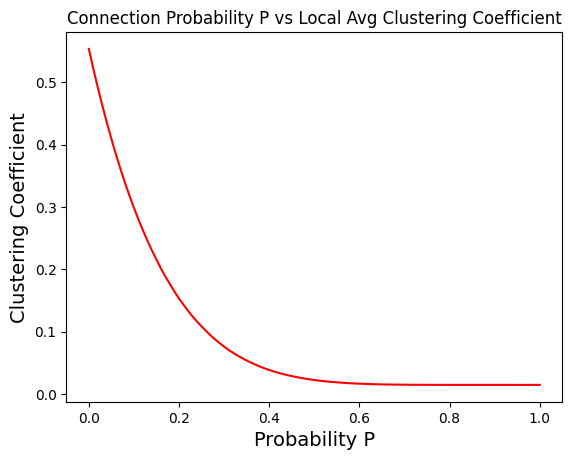

In [20]:
plt.plot(P,local_clustering_coefficients,color='red')
plt.title('Connection Probability P vs Local Avg Clustering Coefficient')
plt.xlabel('Probability P',fontsize=14)
plt.ylabel('Clustering Coefficient',fontsize=14);

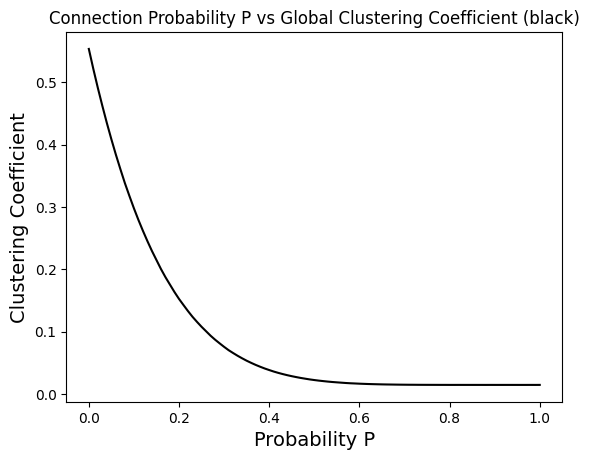

In [21]:
plt.plot(P,global_clustering_coefficients,color='black')
plt.title('Connection Probability P vs Global Clustering Coefficient (black)')
plt.xlabel('Probability P',fontsize=14)
plt.ylabel('Clustering Coefficient',fontsize=14);

Q8

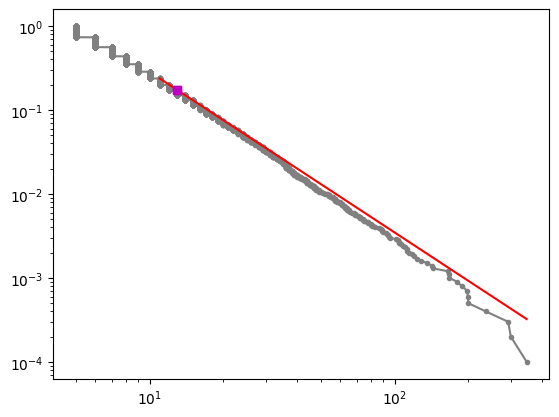

In [5]:
# Inverse cumulative degree distribution. 
pa_graph = ig.Graph.Barabasi(n=10000, m=5)
d = pa_graph.degree()
X = plfit.plfit(d)

#Inverse CDF
X.plotcdf(pointcolor='grey', pointmarker='.', zoom=False)

In [15]:
KS_tst = X.test_pl(niter=100)

p(100) = 1.000


Degree Exponent is 2.9130916977624564


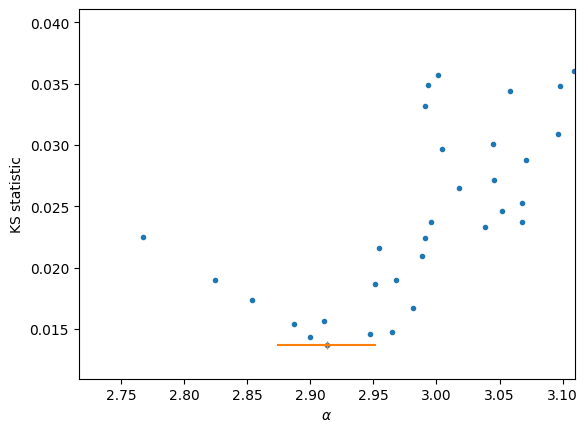

In [16]:
#Degree Exponent
ax = plt.figure(1)
ax = X.alphavsks()
print(f"Degree Exponent is {X.plfit()[1]}")